In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


In [4]:
start='2010-01-01'
end='2024-06-30'
df=yf.download('TSLA',start,end)


[*********************100%%**********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,184.970001,188.800003,182.550003,182.580002,182.580002,61992100
2024-06-25,184.399994,187.970001,182.009995,187.350006,187.350006,63678300
2024-06-26,186.539993,197.759995,186.360001,196.369995,196.369995,95737100
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100


In [7]:
df=df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


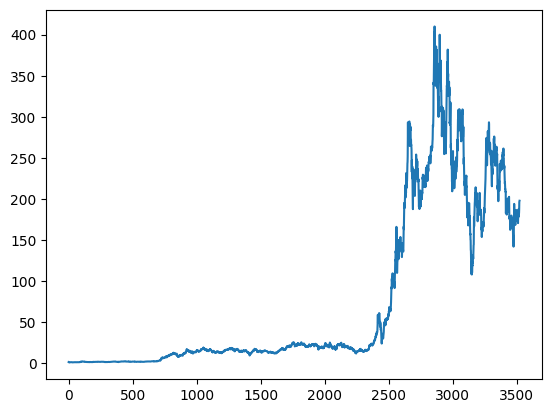

In [9]:
plt.plot(df.Close)

In [10]:
df


,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3519,184.970001,188.800003,182.550003,182.580002,61992100
3520,184.399994,187.970001,182.009995,187.350006,63678300
3521,186.539993,197.759995,186.360001,196.369995,95737100
3522,195.169998,198.720001,194.050003,197.419998,72746500


In [11]:
 ma100=df.Close.rolling(100).mean()
 ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3519    177.9786
3520    177.9792
3521    178.0543
3522    178.1494
3523    178.3176
Name: Close, Length: 3524, dtype: float64

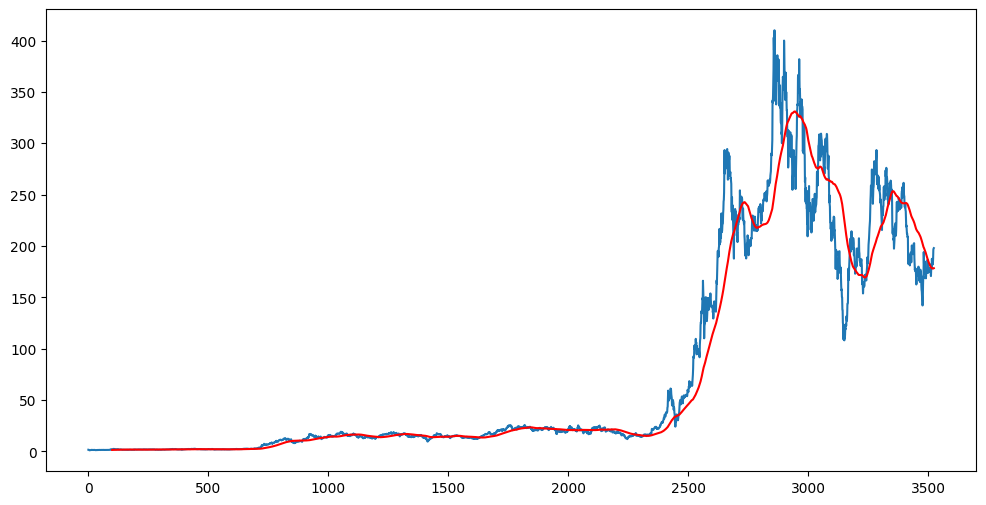

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [13]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3519    207.53815
3520    207.21745
3521    206.95680
3522    206.57600
3523    206.22800
Name: Close, Length: 3524, dtype: float64

In [14]:
ma200[201]

1.5825400018692017

In [ ]:
ma200[200]

1.5821033370494844

In [ ]:
ma200[199]

1.5817566722631455

In [ ]:
ma200[198]



nan

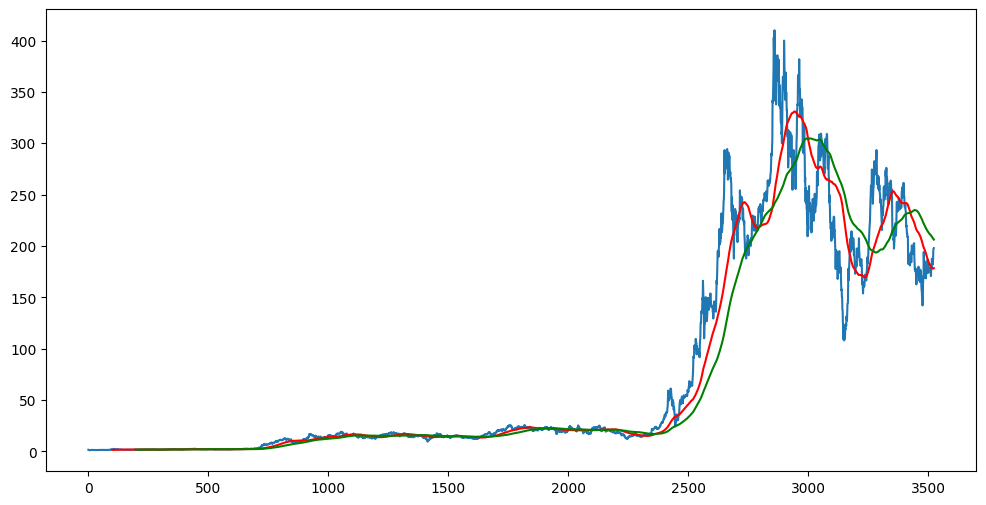

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
df.shape


(3524, 5)

In [18]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2466, 1)
(1058, 1)


In [19]:
data_training.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [20]:
data_testing.head()

,Close
2466,49.680668
2467,50.259335
2468,49.757332
2469,45.781334
2470,48.807335


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [22]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00897275],
       [0.0089062 ],
       [0.00683215],
       ...,
       [0.70445424],
       [0.76982546],
       [0.79194122]])

In [23]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [24]:
x_train.shape

(2366, 100, 1)

In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()


In [27]:
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

c:\Users\Arun\Desktop\project\work1\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)


Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 0.0026
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0022
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0017
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0018
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.0017
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0017
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0015
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0017
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0015
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0018
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0029
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0016
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0021
Epoch 14/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0016
Epoch 15/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 

In [31]:
model.save('keras_model.h5')

In [32]:
data_testing.head()

,Close
2466,49.680668
2467,50.259335
2468,49.757332
2469,45.781334
2470,48.807335


In [33]:
past_100_days=data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
final_df.head()

,Close
0,23.481333
1,23.655333
2,22.202667
3,22.422667
4,21.927999


In [36]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.004003  ],
       [0.00445141],
       [0.00070783],
       ...,
       [0.44954411],
       [0.45225001],
       [0.45343546]])

In [37]:
input_data.shape

(1158, 1)

In [38]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [39]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1058, 100, 1)
(1058,)


In [40]:
y_predicted=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [41]:
y_predicted.shape

(1058, 1)

In [42]:
y_test

array([0.07151975, 0.073011  , 0.07171732, ..., 0.44954411, 0.45225001,
       0.45343546])

In [43]:
y_predicted

array([[0.10648428],
       [0.10673565],
       [0.10706522],
       ...,
       [0.39287543],
       [0.3981623 ],
       [0.4051124 ]], dtype=float32)

In [44]:
scaler.scale_

array([0.00257704])

In [45]:
scale_factor=1/scaler.scale_

In [46]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


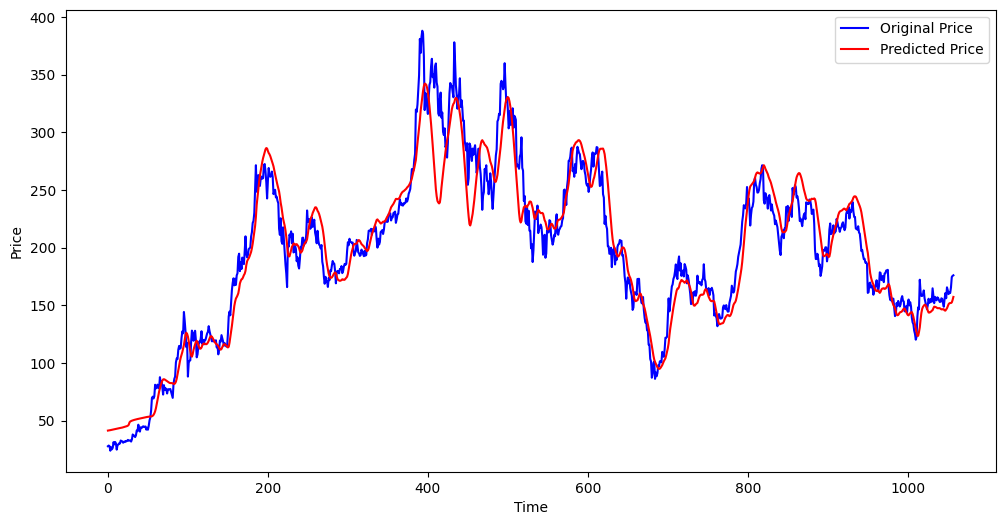

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()